In [93]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
from sklearn.linear_model import LinearRegression
import pandas as pd

file_dir = "/data03/sunyi/time_constrained_cot/outputs/1_20"

model_list = [
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct", 
]

In [94]:
dataset_list = ["math500", "aime24", "amc23"]
something = "_-1_seed0_t0.0_s0_e-1"
max_token_list = [2048, 4096, 8192, 16384, 32768]
prompt_type = "qwen-sbs-hard"

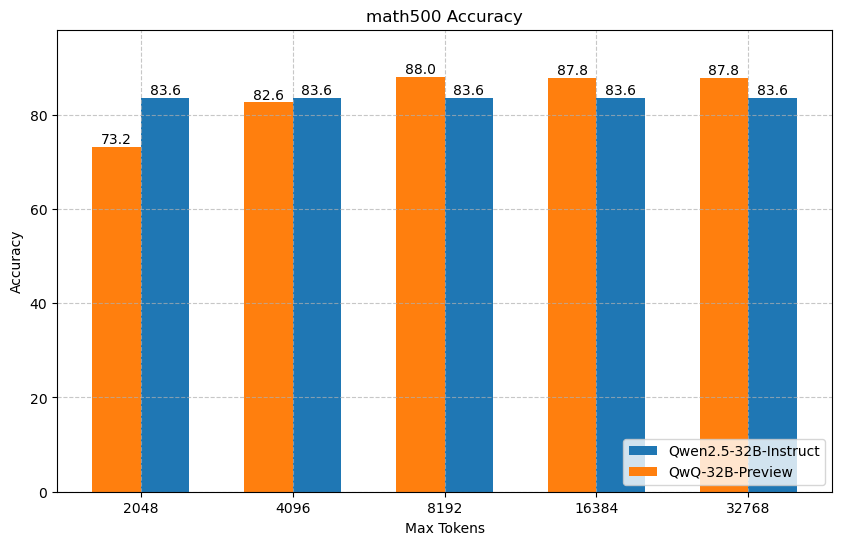

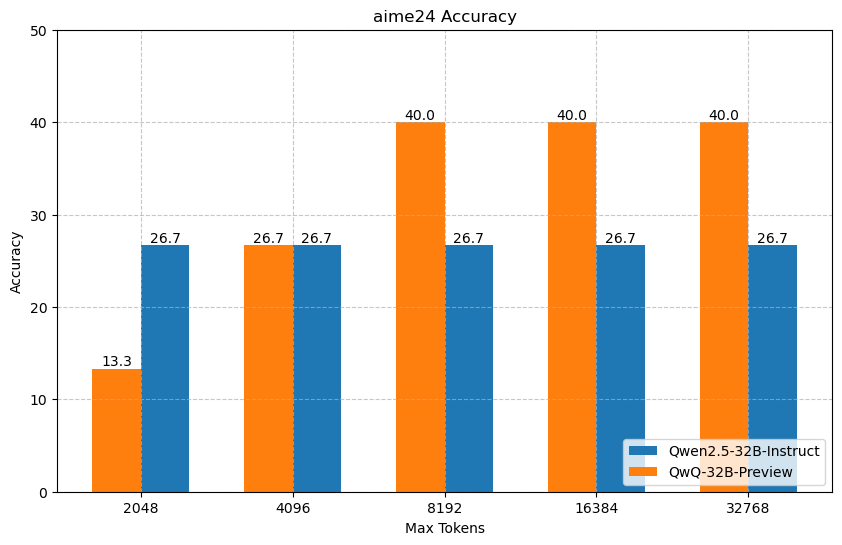

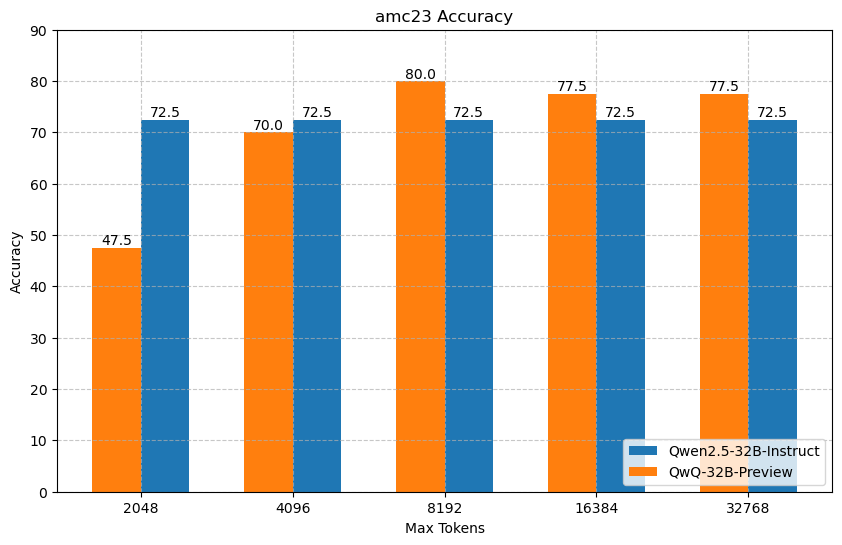

In [95]:
for dataset in dataset_list:
    qwq_acc_list = []
    qwen_acc_list = []
    for budget in max_token_list:
        qwq_file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
        qwq_file_path = os.path.join(file_dir, "Qwen/QwQ-32B-Preview", prompt_type, dataset, qwq_file_name)
        qwen_file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
        qwen_file_path = os.path.join(file_dir, "Qwen/Qwen2.5-32B-Instruct", prompt_type, dataset, qwen_file_name)
        qwq_data = json.load(open(qwq_file_path, "r"))
        qwen_data = json.load(open(qwen_file_path, "r"))
        qwq_acc_list.append(qwq_data["acc"])
        qwen_acc_list.append(qwen_data["acc"])

    # plot bar figure
    plt.figure(figsize=(10, 6))
    
    # Use simplified x positions with smaller range
    x = np.array([x/4 for x in list(range(len(max_token_list)))])  # Even smaller spacing between positions
    width = 0.08  # Reduced width for closer bars
    
    # Create bars and store the bar container objects
    bars1 = plt.bar(x + width/2, qwen_acc_list, width, label="Qwen2.5-32B-Instruct", alpha=1)
    bars2 = plt.bar(x - width/2, qwq_acc_list, width, label="QwQ-32B-Preview", alpha=1)
    
    # Add value labels on top of each bar
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10)
    
    plt.xlabel("Max Tokens")
    plt.ylabel("Accuracy")
    plt.title(f"{dataset} Accuracy")
    plt.legend(loc="lower right")
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks with actual token values
    plt.xticks(x, max_token_list)
    
    # Set y-axis limit to max value + 10
    max_value = max(max(qwen_acc_list), max(qwq_acc_list))
    plt.ylim(0, max_value + 10)
    
    plt.show()
